# K nearest neighbors

KNN falls in the supervised learning family of algorithms. Informally, this means that we are given a labelled dataset consiting of training observations (x, y) and would like to capture the relationship between x and y. More formally, our goal is to learn a function h: X→Y so that given an unseen observation x, h(x) can confidently predict the corresponding output y.

In this module we will explore the inner workings of KNN, choosing the optimal K values and using KNN from scikit-learn.

## Overview

1. Read the problem statement.

2. Get the dataset.

3. Explore the dataset.

4. Pre-processing of dataset.

5. Visualization

6. Transform the dataset for building machine learning model.

7. Split data into train, test set.

8. Build Model.

9. Apply the model.

10. Evaluate the model.

11. Finding Optimal K value

12. Repeat 7, 8, 9 steps.

### Dataset

The data set we’ll be using is the Iris Flower Dataset which was first introduced in 1936 by the famous statistician Ronald Fisher and consists of 50 observations from each of three species of Iris (Iris setosa, Iris virginica and Iris versicolor). Four features were measured from each sample: the length and the width of the sepals and petals.

**Download the dataset here:**
- https://www.kaggle.com/uciml/iris

**Train the KNN algorithm to be able to distinguish the species from one another given the measurements of the 4 features.**

## Load data

### Question 1

Import the data set and print 10 random rows from the data set

Hint: use **sample()** function to get random rows

In [1]:
import pandas as pd
df = pd.read_csv("iris24.csv")
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
5,6,5.4,3.9,1.7,0.4,Iris-setosa
6,7,4.6,3.4,1.4,0.3,Iris-setosa
7,8,5.0,3.4,1.5,0.2,Iris-setosa
8,9,4.4,2.9,1.4,0.2,Iris-setosa
9,10,4.9,3.1,1.5,0.1,Iris-setosa


In [2]:
df.sample(10, random_state=1)

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
59,60,5.2,2.7,3.9,1.4,Iris-versicolor
33,34,5.5,4.2,1.4,0.2,Iris-setosa
69,70,5.6,2.5,3.9,1.1,Iris-versicolor
127,128,6.1,3.0,4.9,1.8,Iris-virginica
31,32,5.4,3.4,1.5,0.4,Iris-setosa
107,108,7.3,2.9,6.3,1.8,Iris-virginica
97,98,6.2,2.9,4.3,1.3,Iris-versicolor
14,15,5.8,4.0,1.2,0.2,Iris-setosa
53,54,5.5,2.3,4.0,1.3,Iris-versicolor
44,45,5.1,3.8,1.9,0.4,Iris-setosa


## Data Pre-processing

### Question 2 - Estimating missing values

Its not good to remove the records having missing values all the time. We may end up loosing some data points. So, we will have to see how to replace those missing values with some estimated values (median)

Calculate the number of missing values per column
- don't use loops

In [3]:
df.isnull().sum()

Id               0
SepalLengthCm    1
SepalWidthCm     2
PetalLengthCm    2
PetalWidthCm     1
Species          0
dtype: int64

Fill missing values with median of that particular column

In [4]:
d = df.fillna(df.median())
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,Iris-setosa
1,2,4.9,3.0,1.40,0.2,Iris-setosa
2,3,4.7,3.2,1.30,0.2,Iris-setosa
3,4,4.6,3.1,1.50,0.2,Iris-setosa
4,5,5.0,3.6,1.40,0.2,Iris-setosa
5,6,5.4,3.9,1.70,0.4,Iris-setosa
6,7,4.6,3.4,1.40,0.3,Iris-setosa
7,8,5.0,3.4,1.50,0.2,Iris-setosa
8,9,4.4,2.9,1.40,0.2,Iris-setosa
9,10,4.9,3.1,1.50,0.1,Iris-setosa


### Question 3 - Dealing with categorical data

Change all the classes to numericals (0 to 2)

Hint: use **LabelEncoder()**

In [44]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
d["Species"]=le.fit_transform(d["Species"])
d

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
5,6,5.4,3.9,1.70,0.4,0
6,7,4.6,3.4,1.40,0.3,0
7,8,5.0,3.4,1.50,0.2,0
8,9,4.4,2.9,1.40,0.2,0
9,10,4.9,3.1,1.50,0.1,0


### Question 4

Observe the association of each independent variable with target variable and drop variables from feature set having correlation in range -0.1 to 0.1 with target variable.

Hint: use **corr()**

In [6]:
d.loc[:,(d.corr()["Species"]>-0.1)|(d.corr()["Species"]<0.1)]
##df.loc[:,df.corr()["Species"]].between[-0.1,0.1,inclusive = "True"].head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.40,0.2,0
1,2,4.9,3.0,1.40,0.2,0
2,3,4.7,3.2,1.30,0.2,0
3,4,4.6,3.1,1.50,0.2,0
4,5,5.0,3.6,1.40,0.2,0
5,6,5.4,3.9,1.70,0.4,0
6,7,4.6,3.4,1.40,0.3,0
7,8,5.0,3.4,1.50,0.2,0
8,9,4.4,2.9,1.40,0.2,0
9,10,4.9,3.1,1.50,0.1,0


### Question 5

Observe the independent variables variance and drop such variables having no variance or almost zero variance (variance < 0.1). They will be having almost no influence on the classification

Hint: use **var()**

In [7]:
df.var()

Id               1938.000000
SepalLengthCm       0.681143
SepalWidthCm        0.188004
PetalLengthCm       3.113179
PetalWidthCm        0.580926
dtype: float64

### Question 6

Plot the scatter matrix for all the variables.

Hint: use **pandas.plotting.scatter_matrix()**

you can also use pairplot()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027928001710>,
      dtype=object)

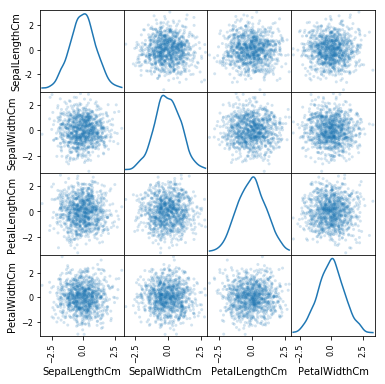

In [50]:
import pandas 
df = pd.DataFrame(np.random.randn(1000, 4), columns = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm'])
pandas.plotting.scatter_matrix(df, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

## Split the dataset into training and test sets


### Question 7

Split the dataset into training and test sets with 80-20 ratio

Hint: use **train_test_split()**

In [51]:
import numpy as np
from scipy.stats import zscore
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import sklearn as sk

bc_feature = d.drop(labels= "Species" , axis = 1) 
bc_labels = d['Species']  

X =  np.array(bc_feature)  
y = np.array(bc_labels)

print(X.shape)
print(y.shape)


X_trainval, X_test, y_trainval, y_test = train_test_split(X,y , test_size=0.20, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.30, random_state=1)
X_train, X_val, y_train, y_val

(152, 5)
(152,)


(array([[1.17e+02, 6.50e+00, 3.00e+00, 5.50e+00, 1.80e+00],
        [1.12e+02, 6.40e+00, 2.70e+00, 5.30e+00, 1.90e+00],
        [5.00e+00, 5.00e+00, 3.60e+00, 1.40e+00, 2.00e-01],
        [3.80e+01, 4.90e+00, 3.10e+00, 1.50e+00, 1.00e-01],
        [1.30e+01, 4.80e+00, 3.00e+00, 1.40e+00, 1.00e-01],
        [7.00e+00, 4.60e+00, 3.40e+00, 1.40e+00, 3.00e-01],
        [7.20e+01, 6.10e+00, 2.80e+00, 4.00e+00, 1.30e+00],
        [6.60e+01, 6.70e+00, 3.10e+00, 4.40e+00, 1.40e+00],
        [6.50e+01, 5.60e+00, 2.90e+00, 3.60e+00, 1.30e+00],
        [4.80e+01, 4.60e+00, 3.20e+00, 1.40e+00, 2.00e-01],
        [1.40e+01, 4.30e+00, 3.00e+00, 1.10e+00, 1.00e-01],
        [5.60e+01, 5.70e+00, 2.80e+00, 4.50e+00, 1.30e+00],
        [8.40e+01, 6.00e+00, 2.70e+00, 5.10e+00, 1.60e+00],
        [1.43e+02, 5.80e+00, 2.70e+00, 5.10e+00, 1.90e+00],
        [1.07e+02, 4.90e+00, 2.50e+00, 4.50e+00, 1.70e+00],
        [3.70e+01, 5.50e+00, 3.50e+00, 1.30e+00, 2.00e-01],
        [3.00e+00, 4.70e+00, 3.20e+00, 1

In [10]:
print("X_train size" , X_train.shape)
print("y_train size" , y_train.shape)
print()
print("X_val size" , X_val.shape)
print("y_val size" , y_val.shape)
print()
print("X_test size" , X_test.shape)
print("y_test size" , y_test.shape)

X_train size (84, 5)
y_train size (84,)

X_val size (37, 5)
y_val size (37,)

X_test size (31, 5)
y_test size (31,)


## Build Model

### Question 8

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [53]:
X_train_z = zscore(X_train)  

X_val_z = zscore(X_val)

X_test_z = zscore(X_test)


In [54]:
NNH = KNeighborsClassifier(n_neighbors= 5 , weights = 'distance' )
NNH.fit(X_train_z,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='distance')

In [55]:
predicted_val_labels = NNH.predict(X_val_z)
NNH.score(X_val_z, y_val)

0.972972972972973

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_z,y_train)
y_pred = knn.predict(X_train_z)
print("Value when n=5:",metrics.accuracy_score(y_train, y_pred))
print(metrics.confusion_matrix(y_val, predicted_val_labels))

Value when n=5: 0.9880952380952381
[[11  0  0]
 [ 0  9  0]
 [ 0  1 16]]


In [15]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_z,y_train)
y_pred = knn.predict(X_train_z)
print("Value when n=3:",metrics.accuracy_score(y_train, y_pred))
print(metrics.confusion_matrix(y_val, predicted_val_labels))

Value when n=3: 1.0
[[11  0  0]
 [ 0  9  0]
 [ 0  1 16]]


In [57]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_z,y_train)
y_pred = knn.predict(X_train_z)
print("Value when n=9:",metrics.accuracy_score(y_train, y_pred))
print(metrics.confusion_matrix(y_val, predicted_val_labels))

Value when n=9: 0.9880952380952381
[[11  0  0]
 [ 0  9  0]
 [ 0  1 16]]


## Find optimal value of K

### Question 9 - Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [17]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,20))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_z, y_train, cv=19, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d", best_k)

The optimal number of neighbors is %d 2


## Plot accuracy

### Question 10

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

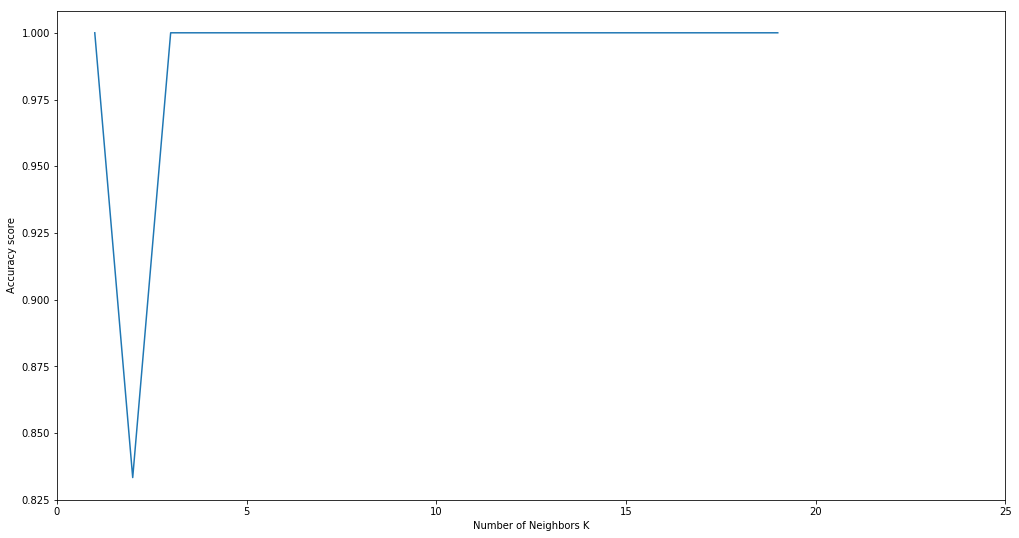

In [18]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, scores)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy score')
plt.show()

# Breast cancer dataset

## Read data

### Question 1
Read the data given in bc2.csv file

In [111]:
df = pd.read_csv("bc2.csv")
df

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Data preprocessing

### Question 2
Observe the no.of records in dataset and type of each column

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 699 entries, 0 to 698
Data columns (total 11 columns):
ID                             699 non-null int64
ClumpThickness                 699 non-null int64
Cell Size                      699 non-null int64
Cell Shape                     699 non-null int64
Marginal Adhesion              699 non-null int64
Single Epithelial Cell Size    699 non-null int64
Bare Nuclei                    699 non-null object
Normal Nucleoli                699 non-null int64
Bland Chromatin                699 non-null int64
Mitoses                        699 non-null int64
Class                          699 non-null int64
dtypes: int64(10), object(1)
memory usage: 60.1+ KB


### Question 3
Use summary statistics to check if missing values, outlier and encoding treament is necessary

Hint: use **describe()**

In [113]:
df.describe()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,5.000000,4.000000,1.000000,4.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,4.000000


#### Check Missing Values

In [114]:
df.isna()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False,False,False,False,False


### Question 4
#### Check how many `?` are there in Bare Nuclei feature (they are also unknown or missing values). 

In [127]:
df.isna().sum()

ID                             0
ClumpThickness                 0
Cell Size                      0
Cell Shape                     0
Marginal Adhesion              0
Single Epithelial Cell Size    0
Bare Nuclei                    0
Normal Nucleoli                0
Bland Chromatin                0
Mitoses                        0
Class                          0
dtype: int64

#### Replace them with the 'top' value of the describe function of Bare Nuclei feature

Hint: give value of parameter include='all' in describe function

In [128]:
df.describe(include="all")

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,699.0,699.000000,699.000000,699.000000,699.000000
unique,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,NaN,NaN,402.0,NaN,NaN,NaN,NaN
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,NaN,3.437768,2.866953,1.589413,2.689557
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,NaN,2.438364,3.053634,1.715078,0.951273
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,1.000000,1.000000,1.000000,2.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,NaN,2.000000,1.000000,1.000000,2.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,NaN,3.000000,1.000000,1.000000,2.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,NaN,5.000000,4.000000,1.000000,4.000000


In [129]:
df[['Bare Nuclei',"ID","ClumpThickness","Cell Size","Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Normal Nucleoli","Bland Chromatin","Mitoses","Class"]]\
=df[['Bare Nuclei',"ID","ClumpThickness","Cell Size","Cell Shape","Marginal Adhesion","Single Epithelial Cell Size","Normal Nucleoli","Bland Chromatin","Mitoses","Class"]].apply(pd.to_numeric, errors = "coerce")

In [131]:
data = df['Bare Nuclei']

print(data[1:25])
data = data.fillna(value = 1, inplace=True)
df

1     10.0
2      2.0
3      4.0
4      1.0
5     10.0
6     10.0
7      1.0
8      1.0
9      1.0
10     1.0
11     1.0
12     3.0
13     3.0
14     9.0
15     1.0
16     1.0
17     1.0
18    10.0
19     1.0
20    10.0
21     7.0
22     1.0
23     1.0
24     1.0
Name: Bare Nuclei, dtype: float64


,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1.0,3,1,1,2
1,1002945,5,4,4,5,7,10.0,3,2,1,2
2,1015425,3,1,1,1,2,2.0,3,1,1,2
3,1016277,6,8,8,1,3,4.0,3,7,1,2
4,1017023,4,1,1,3,2,1.0,3,1,1,2
5,1017122,8,10,10,8,7,10.0,9,7,1,4
6,1018099,1,1,1,1,2,10.0,3,1,1,2
7,1018561,2,1,2,1,2,1.0,3,1,1,2
8,1033078,2,1,1,1,2,1.0,1,1,5,2
9,1033078,4,2,1,1,2,1.0,2,1,1,2


### Question 5
#### Find the distribution of target variable (Class) 

In [132]:
df.groupby(["Class"]).count()

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses
Class,,,,,,,,,,
2,458,458,458,458,458,458,458,458,458,458
4,241,241,241,241,241,241,241,241,241,241


#### Plot the distribution of target variable using histogram

(array([458.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0., 241.]),
 array([2. , 2.2, 2.4, 2.6, 2.8, 3. , 3.2, 3.4, 3.6, 3.8, 4. ]),
 <a list of 10 Patch objects>)

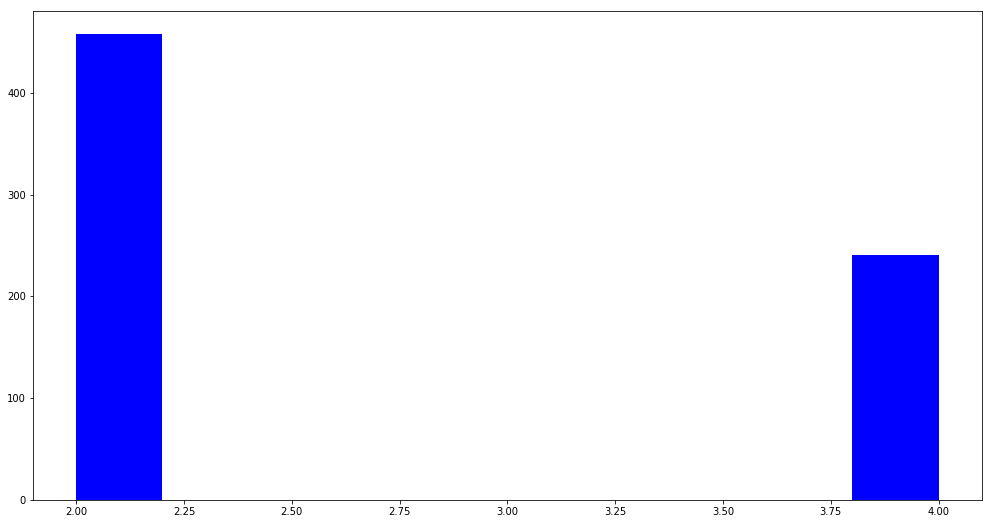

In [133]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.hist(df['Class'], color = 'blue')

#### Convert the datatype of Bare Nuclei to `int`

In [134]:
data_BN = df["Bare Nuclei"]
df["Bare Nuclei"] = data_BN.astype("int")
df

,ID,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2
5,1017122,8,10,10,8,7,10,9,7,1,4
6,1018099,1,1,1,1,2,10,3,1,1,2
7,1018561,2,1,2,1,2,1,3,1,1,2
8,1033078,2,1,1,1,2,1,1,1,5,2
9,1033078,4,2,1,1,2,1,2,1,1,2


## Scatter plot

### Question 6
Plot Scatter Matrix to understand the distribution of variables and check if any variables are collinear and drop one of them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027935597390>,
      dtype=object)

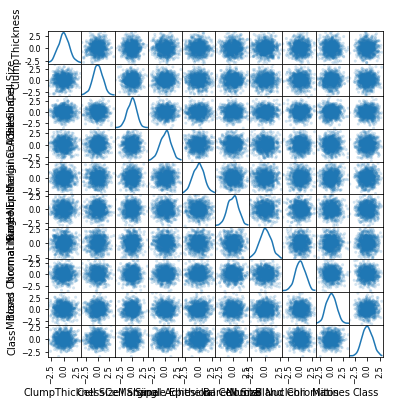

In [137]:
import pandas 
dfs = pd.DataFrame(np.random.randn(1000, 10), columns = ['ClumpThickness', 'Cell Size', 'Cell Shape', 'Marginal Adhesion','Single Epithelial Cell Size','Bare Nuclei','Normal Nucleoli','Bland Chromatin ','Mitoses ','Class'])
pandas.plotting.scatter_matrix(dfs, alpha = 0.2, figsize = (6, 6), diagonal = 'kde')

In [139]:
df.drop("ID", axis=1)

,ClumpThickness,Cell Size,Cell Shape,Marginal Adhesion,Single Epithelial Cell Size,Bare Nuclei,Normal Nucleoli,Bland Chromatin,Mitoses,Class
0,5,1,1,1,2,1,3,1,1,2
1,5,4,4,5,7,10,3,2,1,2
2,3,1,1,1,2,2,3,1,1,2
3,6,8,8,1,3,4,3,7,1,2
4,4,1,1,3,2,1,3,1,1,2
5,8,10,10,8,7,10,9,7,1,4
6,1,1,1,1,2,10,3,1,1,2
7,2,1,2,1,2,1,3,1,1,2
8,2,1,1,1,2,1,1,1,5,2
9,4,2,1,1,2,1,2,1,1,2


## Train test split

### Question 7
#### Divide the dataset into feature set and target set

In [140]:
bc_feature_df = df.drop(labels= "Class" , axis = 1)   # all independent features extracted into a dataframe
bc_labels = df['Class'] 

X =  np.array(bc_feature_df)  
y = np.array(bc_labels)

print(X.shape)
print(y.shape)

(699, 10)
(699,)


#### Divide the Training and Test sets in 70:30 

In [141]:
X_trainval, X_test, y_trainval, y_test = train_test_split(X,y , test_size=0.30, random_state=1)

X_train, X_val, y_train, y_val = train_test_split(X_trainval, y_trainval, test_size=0.30, random_state=1)

print("X_train size" , X_train.shape)
print("y_train size" , y_train.shape)
print()
print("X_val size" , X_val.shape)
print("y_val size" , y_val.shape)
print()
print("X_test size" , X_test.shape)
print("y_test size" , y_test.shape)

X_train size (342, 10)
y_train size (342,)

X_val size (147, 10)
y_val size (147,)

X_test size (210, 10)
y_test size (210,)


## Scale the data

### Question 8
Standardize the data

Hint: use **StandardScaler()**

In [142]:
from sklearn.preprocessing import StandardScaler
data = df
scaler = StandardScaler()
print(scaler.fit(data))
StandardScaler(copy=True, with_mean=True, with_std=True)
print(scaler.mean_)

StandardScaler(copy=True, with_mean=True, with_std=True)
[1.07170410e+06 4.41773963e+00 3.13447783e+00 3.20743920e+00
 2.80686695e+00 3.21602289e+00 3.48640916e+00 3.43776824e+00
 2.86695279e+00 1.58941345e+00 2.68955651e+00]


E:\Anaconda\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)


## Build Model

### Question 9

Build the model and train and test on training and test sets respectively using **scikit-learn**.

Print the Accuracy of the model with different values of **k = 3, 5, 9**

Hint: For accuracy you can check **accuracy_score()** in scikit-learn

In [143]:
X_train_z = zscore(X_train)  

X_val_z = zscore(X_val)

X_test_z = zscore(X_test)

In [144]:
NNH = KNeighborsClassifier(n_neighbors= 3 , weights = 'distance' )
NNH.fit(X_train_z,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [145]:
predicted_val_labels = NNH.predict(X_val_z)
NNH.score(X_val_z, y_val)

0.9455782312925171

In [146]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_z,y_train)
y_pred = knn.predict(X_train_z)
print("Value when n=5:",metrics.accuracy_score(y_train, y_pred))
print(metrics.confusion_matrix(y_val, predicted_val_labels))

Value when n=5: 0.9619883040935673
[[96  4]
 [ 4 43]]


In [147]:
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train_z,y_train)
y_pred = knn.predict(X_train_z)
print("Value when n=3:",metrics.accuracy_score(y_train, y_pred))
print(metrics.confusion_matrix(y_val, predicted_val_labels))


Value when n=3: 0.9649122807017544
[[96  4]
 [ 4 43]]


In [148]:
knn = KNeighborsClassifier(n_neighbors=9)
knn.fit(X_train_z,y_train)
y_pred = knn.predict(X_train_z)
print("Value when n=9:",metrics.accuracy_score(y_train, y_pred))
print(metrics.confusion_matrix(y_val, predicted_val_labels))

Value when n=9: 0.9590643274853801
[[96  4]
 [ 4 43]]


## Find optimal value of K

### Question 10
Finding Optimal value of k

- Run the KNN with no of neighbours to be 1, 3, 5 ... 19
- Find the **optimal number of neighbours** from the above list

In [149]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# creating odd list of K for KNN
myList = list(range(1,20))


# empty list that will hold cv scores
cv_scores = []
k_neighbors = []

# perform 10-fold cross validation
for k in myList:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train_z, y_train, cv=19, scoring='accuracy')
    cv_scores.append(scores.mean())
    k_neighbors.append(k)


MSE = [1 - x for x in cv_scores]
min(MSE)
MSE.index(min(MSE))
best_k = myList[MSE.index(min(MSE))]
print ("The optimal number of neighbors is %d", best_k)

The optimal number of neighbors is %d 9


## Plot accuracy

### Question 11

Plot accuracy score vs k (with k value on X-axis) using matplotlib.

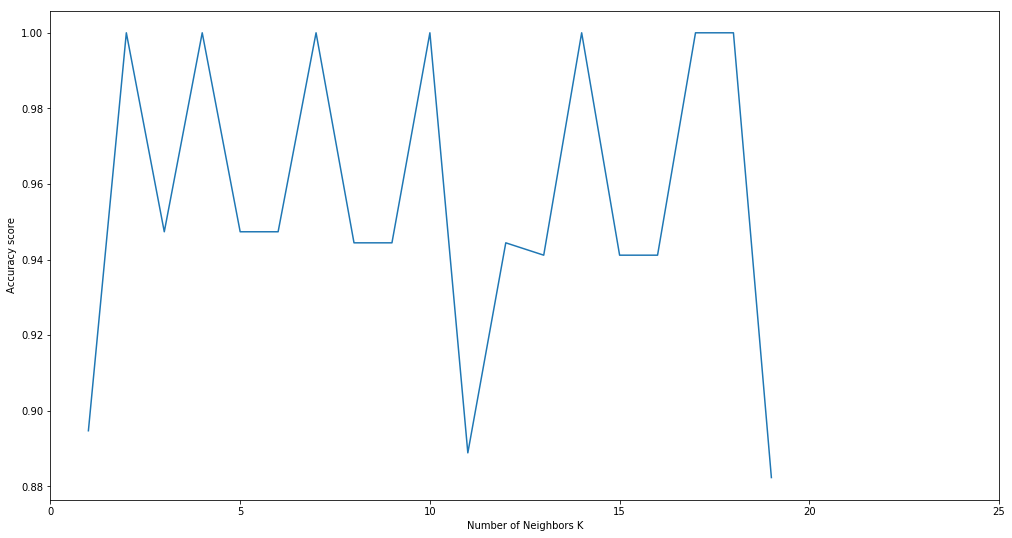

In [150]:
%matplotlib inline 
import matplotlib.pyplot as plt

fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 17
fig_size[1] = 9
plt.rcParams["figure.figsize"] = fig_size

plt.xlim(0,25)


# plot misclassification error vs k
plt.plot(k_neighbors, scores)



plt.xlabel('Number of Neighbors K')
plt.ylabel('Accuracy score')
plt.show()